In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sns
import random
import statsmodels.api as sm
import scipy.stats as stats

#load in data for PA counties
PAcoviddat = pd.read_csv('PA-counties.csv')

PAdensitydat = pd.read_csv('PApopdensity.csv')

PAginidat = pd.read_csv('Ginidat.csv')

PAageover60 = pd.read_csv('PA-ageover60.csv')

# PAcoviddat["Density"] =[PAdensitydat['density']]

countarr = np.arange(1,68)

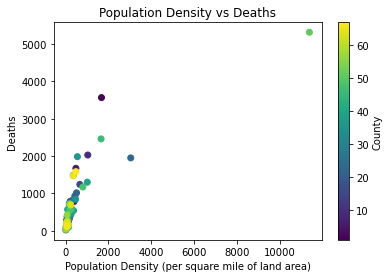

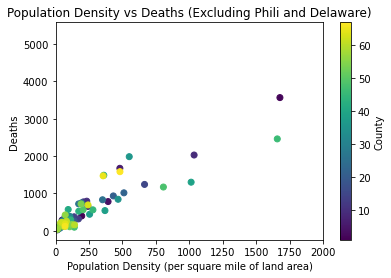

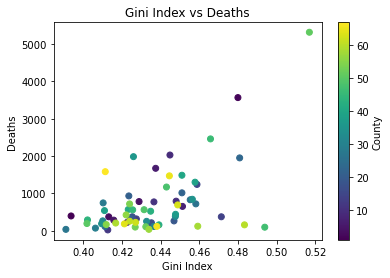

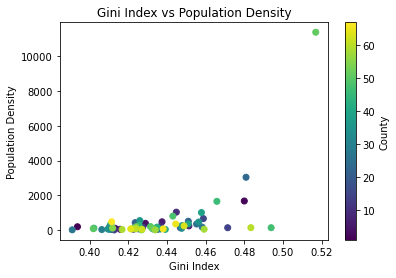

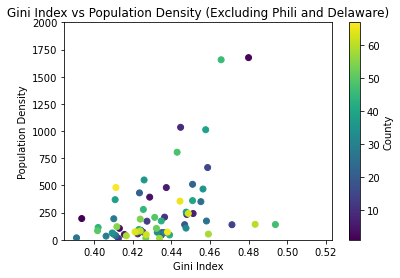

In [2]:
#Plot of pop density vs deaths
plt.scatter(PAdensitydat['density'],PAcoviddat['deaths'], c = countarr)
plt.xlabel("Population Density (per square mile of land area)")
plt.ylabel("Deaths")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Population Density vs Deaths')
plt.show()

##plot of population density vs deaths excluding Philidelphia and Delaware (to get a better view at lower points trend)
plt.scatter(PAdensitydat['density'],PAcoviddat['deaths'], c = countarr)
plt.xlabel("Population Density (per square mile of land area)")
plt.ylabel("Deaths")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Population Density vs Deaths (Excluding Phili and Delaware)')
plt.xlim([0,2000])
plt.show()

# ##plot of population over 60 vs deaths
# plt.scatter(PAageover60['Percent'],PAcoviddat['deaths'], c = countarr)
# plt.xlabel("Population over 60")
# plt.ylabel("Deaths")
# cbar = plt.colorbar()
# cbar.set_label('County')
# plt.title('Population Age over 60 vs Deaths')
# plt.show()


#Plot of gini index vs deaths
plt.scatter(PAginidat['Gini'],PAcoviddat['deaths'], c = countarr)
plt.xlabel("Gini Index")
plt.ylabel("Deaths")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Gini Index vs Deaths')
plt.show()

#plot gini index vs population density
plt.scatter(PAginidat['Gini'],PAdensitydat['density'], c = countarr)
plt.xlabel("Gini Index")
plt.ylabel("Population Density")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Gini Index vs Population Density')
plt.show()

#plot of gini index vs population density excluding Philidelphia and Delaware (to get a better view at lower points trend)
plt.scatter(PAginidat['Gini'],PAdensitydat['density'], c = countarr)
plt.xlabel("Gini Index")
plt.ylabel("Population Density")
cbar = plt.colorbar()
cbar.set_label('County')
plt.title('Gini Index vs Population Density (Excluding Phili and Delaware)')
plt.ylim([0,2000])
plt.show()

# ##plot of population over 60 vs deaths
# plt.scatter(PAageover60['Percent'],PAginidat['Gini'], c = countarr)
# plt.xlabel("Population over 60")
# plt.ylabel("Gini Index")
# cbar = plt.colorbar()
# cbar.set_label('County')
# plt.title('Population Age over 60 vs Deaths')
# plt.show()

Since Pennsylvania is a large state with 67 counties, there are more than enough data points in order to conduct analysis through t/u-tests. Population density and gini index does not seem to show much dependence, at most there may be a slight upward trend. Although, some of the higher gini indexs are at a sub 100 population density.

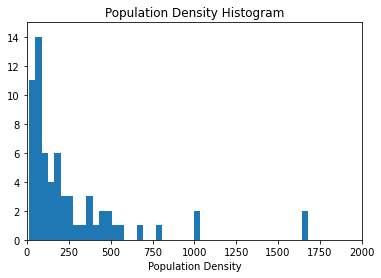

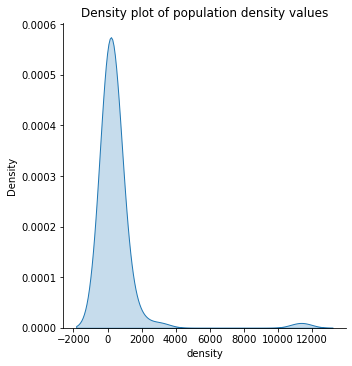

From the above plots, it can be assumed that the population density between counties in PA follows a normal distribution



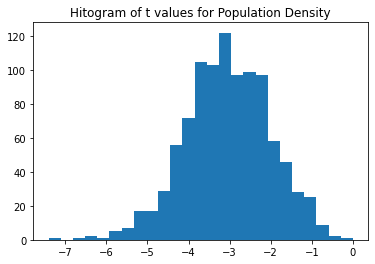

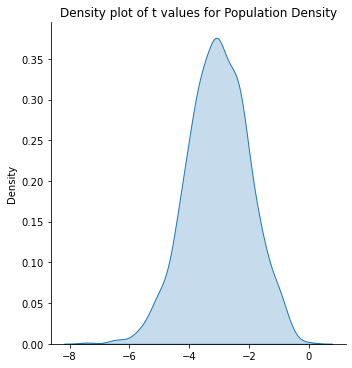

The value of t from a two sided t-test comparing death numbers corresponding to high and low populations is -4.78
The degrees of freedom are 11.34

So taking an alpha of 0.05 we have a critical t-value of region of -2.201 to 2.201, since our value of -4.78 falls
 outside the critical region, we can reject the null hypothesis

Ttest_indResult(statistic=-9.130950496261873, pvalue=2.9146651121001863e-13)


In [22]:
#Are people in counties with higher population densities in PA more likely to have experienced fatal outcomes?
#Null hypothesis: do people in higher and lower population densities have the same number of fatal outcomes?

#Histogram of density to check if distribution is normal
plt.hist(PAdensitydat['density'],300);
plt.xlim([0,2000])
plt.ylim([0,15])
plt.title('Population Density Histogram')
plt.xlabel('Population Density');
plt.show()

sns.displot(PAdensitydat['density'],kind="kde",fill=True);
plt.title('Density plot of population density values');
plt.show()

print('From the above plots, it can be assumed that the population density between counties in PA follows a normal distribution\n')

#sets up a new column in the covid data with a value of 0 if the deaths is on the low end of the pop density
# and a 1 if it is on the high end
avgdensity = np.average(PAdensitydat['density'])
PAcoviddat["D H/L"] =[1 if x> avgdensity else 0 for x in PAdensitydat['density']]

deathshpop = np.c_[PAcoviddat["deaths"],PAcoviddat["D H/L"]]

#loop to seperate the high and low values
n = 0
x = 0
hpop = []
lpop = []

for n in range(len(deathshpop)):
    if np.product(deathshpop[n:n+1]) == 0:
        lpop[n:n+1] = deathshpop[n:n+1] 
    else:
        hpop[n:n+1] = deathshpop[n:n+1]
       

lpop = np.column_stack(lpop)
lpop = lpop[0]
hpop = np.column_stack(hpop)
hpop = hpop[0]

#two sample t test
n = 5
t = np.zeros(1000)
sigma1lpop = np.std(lpop, ddof = 1)
mean1 = np.mean(lpop)
sigma2hpop = np.std(hpop, ddof = 1)
mean2 = np.mean(hpop)
sp = np.sqrt(((sigma1lpop)**2+(sigma2hpop)**2)/2)

norm_data1 = np.random.normal(mean1,sigma1lpop,10000);
norm_data2 = np.random.normal(mean2,sigma2hpop,10000);

for m in np.arange(1,1000,1):
    tmp1 = random.sample(list(norm_data1),n)
    X1=np.average(tmp1)
    sigma1=np.std(tmp1)
    tmp2 = random.sample(list(norm_data2),n)
    X2=np.average(tmp2)
    sigma2=np.std(tmp2)
    t[m-1] = (X1-X2)/(sp*np.sqrt(2/n))

#histogram plot
DOF = 2*n-2
plt.hist(t, bins = 25)
plt.title('Hitogram of t values for Population Density');
# plt.xlim(-15,15);
plt.show()

#Density plot
sns.displot(t,kind="kde",fill=True);
plt.title('Density plot of t values for Population Density');
plt.show()

#Calculated T-value
n1 = len(lpop)
n2 = len(hpop)
stri = np.sqrt((sigma1lpop**2)/n1+(sigma2hpop**2)/n2)
df = (((sigma1lpop**2/n1 + sigma2hpop**2/n2))**2)/(((sigma1lpop**2/n1)**2)/(n1-1)+((sigma2hpop**2/n2)**2)/(n2-1))
tdensity = (mean1-mean2)/(stri)
print(f'The value of t from a two sided t-test comparing death numbers corresponding to high and low populations is {tdensity:0.2f}')
print(f'The degrees of freedom are {df:0.2f}')
print(f'\nSo taking an alpha of 0.05 we have a critical t-value of region of -2.201 to 2.201, since our value of {tdensity:0.2f} falls\noutside the critical region, we can reject the null hypothesis\n')
print(stats.ttest_ind(lpop, hpop))

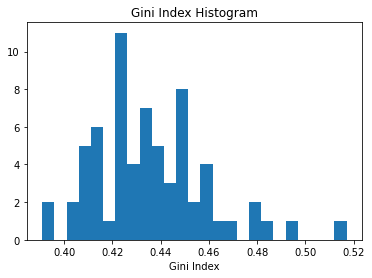

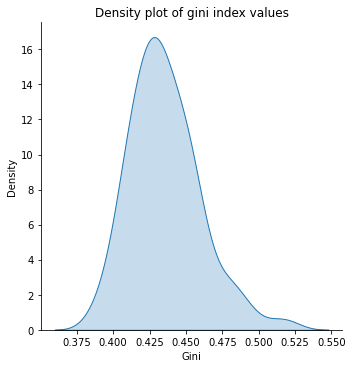

From the above plots, it can be assumed that the gini index between counties in PA follows a normal distribution



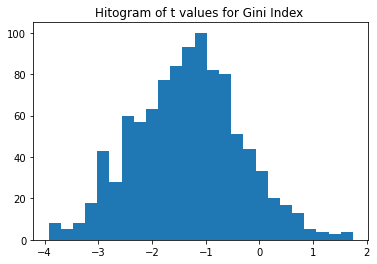

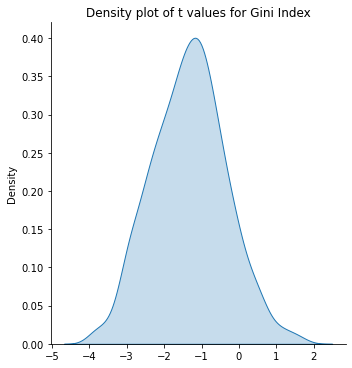

The value of t from a two sided t-test comparing death numbers corresponding to high and low populations is -3.18
The degrees of freedom are 33.26

So taking an alpha of 0.05 we have a critical t-value of region of -2.04 to 2.04, since our value of -3.18 falls
outside the critical region, we can reject the null hypothesis

Ttest_indResult(statistic=-3.5453155247738515, pvalue=0.0007327784285939558)


In [23]:
#Are people in counties with higher income inequality (gini index) in PA more likely to have experienced fatal outcomes?

#Histogram of density to check if distribution is normalplt.hist(PAdensitydat['density'],300);
plt.hist(PAginidat['Gini'],25);
plt.title('Gini Index Histogram')
plt.xlabel('Gini Index');
plt.show()

sns.displot(PAginidat['Gini'],kind="kde",fill=True);
plt.title('Density plot of gini index values');
plt.show()

print('From the above plots, it can be assumed that the gini index between counties in PA follows a normal distribution\n')

#sets up a new column in the covid data with a value of 0 if the deaths is on the low end of the gini index
# and a 1 if it is on the high end
avggini = np.average(PAginidat['Gini'])
PAcoviddat["G H/L"] =[1 if x> avggini else 0 for x in PAginidat['Gini']]

deathshgini = np.c_[PAcoviddat["deaths"],PAcoviddat["G H/L"]]

#loop to seperate the high and low values
n = 0
x = 0
hgini = []
lgini = []

for n in range(len(deathshgini)):
    if np.product(deathshgini[n:n+1]) == 0:
        lgini[n:n+1] = deathshgini[n:n+1] 
    else:
        hgini[n:n+1] = deathshgini[n:n+1]
      

lgini = np.column_stack(lgini)
lgini = lgini[0]
hgini = np.column_stack(hgini)
hgini = hgini[0]

#two sample t test
n = 5
t = np.zeros(1000)
sigma1lgini = np.std(lgini, ddof = 1)
mean1 = np.mean(lgini)
sigma2hgini = np.std(hgini, ddof = 1)
mean2 = np.mean(hgini)

sp = np.sqrt(((sigma1lgini)**2+(sigma2hgini)**2)/2)

norm_data1 = np.random.normal(mean1,sigma1lgini,10000);
norm_data2 = np.random.normal(mean2,sigma2hgini,10000);

for m in np.arange(1,1000,1):
    tmp1 = random.sample(list(norm_data1),n)
    X1=np.average(tmp1)
    sigma1=np.std(tmp1)
    tmp2 = random.sample(list(norm_data2),n)
    X2=np.average(tmp2)
    sigma2=np.std(tmp2)
    t[m-1] = (X1-X2)/(sp*np.sqrt(2/n))

#histogram plot
DOF = 2*n-2
plt.hist(t, bins = 25)
plt.title('Hitogram of t values for Gini Index ');
plt.show()
# plt.xlim(-15,15);

#Density plot
sns.displot(t,kind="kde",fill=True);
plt.title('Density plot of t values for Gini Index');
plt.show()

#Calculated T-value
n1 = len(lgini)
n2 = len(hgini)
stri = np.sqrt((sigma1lgini**2)/n1+(sigma2hgini**2)/n2)
df = (((sigma1lgini**2/n1 + sigma2hgini**2/n2))**2)/(((sigma1lgini**2/n1)**2)/(n1-1)+((sigma2hgini**2/n2)**2)/(n2-1))
tgini = (mean1-mean2)/(stri)
print(f'The value of t from a two sided t-test comparing death numbers corresponding to high and low populations is {tgini:0.2f}')
print(f'The degrees of freedom are {df:0.2f}')
print(f'\nSo taking an alpha of 0.05 we have a critical t-value of region of -2.04 to 2.04, since our value of {tgini:0.2f} falls\noutside the critical region, we can reject the null hypothesis\n')
print(stats.ttest_ind(lgini, hgini))

In [6]:
#Were people in less densely populated counties with lower income inequality (gini index) in PA less likely to have experienced fatal outcomes?

#linear regression analysis
# Need to make array matrices. This is for when there is an intercept
# X = np.c_[np.ones(len(PAcoviddat)),PAcoviddat["D H/L"],PAcoviddat["G H/L"]]
# tmp = inv(np.matmul(np.transpose(X),X))

# INTERCEPT, SLOPE1, SLOPE2 = tmp @ np.transpose(X) @ PAcoviddat["deaths"]
# print(f'Our intercept is {INTERCEPT:0.2f} and our slope1 is {SLOPE1:0.2f} and slope2 is {SLOPE2:0.2f}')

# import statsmodels.api as sm
# model = sm.OLS(PAcoviddat["deaths"],X).fit()
# print(model.summary())

#Linear regression no interaction
X = np.c_[np.ones(len(PAcoviddat)),PAdensitydat['density'],PAginidat['Gini']]
tmp = inv(np.matmul(np.transpose(X),X))
INTERCEPT, SLOPE1, SLOPE2 = tmp @ np.transpose(X) @ PAcoviddat["deaths"]
print(f'Our intercept is {INTERCEPT:0.2f} and our slope1 is {SLOPE1:0.2f} and slope2 is {SLOPE2:0.2f}')

import statsmodels.api as sm
model = sm.OLS(PAcoviddat["deaths"],X).fit()
print(model.summary())

#Linear regression interaction
X = np.c_[np.ones(len(PAcoviddat)),PAdensitydat['density'],PAginidat['Gini'],np.multiply(PAdensitydat['density'],PAginidat['Gini'])]
tmp = inv(np.matmul(np.transpose(X),X))
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ PAcoviddat["deaths"]
print(f'\nOur intercept is {INTERCEPT:0.2f} and our slope is {SLOPE1:0.2f} and slope2 is {SLOPE2:0.2f} and slope3 is {SLOPE3:0.2f}')

import statsmodels.api as sm
model = sm.OLS(PAcoviddat["deaths"],X).fit()
print(model.summary())


# X = np.c_[np.ones(len(PAcoviddat)),PAdensitydat['density']]
# tmp = inv(np.matmul(np.transpose(X),X))
# INTERCEPT, SLOPE1 = tmp @ np.transpose(X) @ PAcoviddat["deaths"]
# print(f'Our intercept is {INTERCEPT:0.2f} and our slope1 is {SLOPE1:0.2f}')

# model = sm.OLS(PAcoviddat["deaths"],X).fit()
# print(model.summary())

# X = np.c_[np.ones(len(PAcoviddat)),PAginidat['Gini']]
# tmp = inv(np.matmul(np.transpose(X),X))
# INTERCEPT, SLOPE1 = tmp @ np.transpose(X) @ PAcoviddat["deaths"]
# print(f'Our intercept is {INTERCEPT:0.2f} and our slope1 is {SLOPE1:0.2f}')

# model = sm.OLS(PAcoviddat["deaths"],X).fit()
# print(model.summary())

# X = np.c_[PAginidat['Gini']]
# tmp = inv(np.matmul(np.transpose(X),X))
# SLOPE1 = tmp @ np.transpose(X) @ PAcoviddat["deaths"]
# print(f'Our intercept is and our slope1 is ',SLOPE1)

# import statsmodels.api as sm
# model = sm.OLS(PAcoviddat["deaths"],X).fit()
# print(model.summary())



Our intercept is -2252.22 and our slope1 is 0.44 and slope2 is 6323.59
                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     68.73
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           1.16e-16
Time:                        21:13:32   Log-Likelihood:                -510.29
No. Observations:                  67   AIC:                             1027.
Df Residuals:                      64   BIC:                             1033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------